# Mortality and Air Polution
## 3.6 SMSA

In [4]:
install.packages("tidyverse")
require(tidyverse)

smsa_df <- read.table("/Users/jmanderson/statistics/02_intro-to-regression/ARM by Iain - Exercises/data/smsa.csv", 
                       sep=",", header = T, stringsAsFactors = F)


The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpT0c1rp/downloaded_packages


In [18]:
head(smsa_df)

,City,Mort,Edu,Nwt,Jant,Rain,Nox,Hum,Inc
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>
1,"Akron, OH",921.87,11.4,8.8,27,36,2.71,59,29.560
2,"Albany-Schenectady-Troy, NY",997.87,11.0,3.5,23,35,2.30,57,31.458
3,"Allentown, Bethlehem, PA-NJ",962.35,9.8,0.8,29,44,1.79,54,31.856
4,"Atlanta, GA",982.29,11.1,27.1,45,47,2.08,56,32.452
5,"Baltimore, MD",1071.29,9.6,24.4,35,43,3.64,55,32.368
6,"Birmingham, AL",1030.38,10.2,38.5,45,53,3.47,54,27.835


# Full Model

In [26]:
lmMortFull <- lm(Mort~Edu + Nwt + Jant + Rain + Nox + Hum + Inc, smsa_df)
summary(lmMortFull) 


Call:
lm(formula = Mort ~ Edu + Nwt + Jant + Rain + Nox + Hum + Inc, 
    data = smsa_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.380 -22.118   2.907  23.154  77.369 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1006.2441    95.0827  10.583 3.84e-14 ***
Edu          -15.3459     7.2515  -2.116  0.03954 *  
Nwt            4.2140     0.6850   6.152 1.47e-07 ***
Jant          -2.1500     0.6593  -3.261  0.00204 ** 
Rain           1.6238     0.5643   2.878  0.00596 ** 
Nox           18.5481     5.5065   3.368  0.00150 ** 
Hum            0.5371     0.9024   0.595  0.55451    
Inc           -0.3453     1.3038  -0.265  0.79227    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35.48 on 48 degrees of freedom
Multiple R-squared:  0.7137,	Adjusted R-squared:  0.6719 
F-statistic: 17.09 on 7 and 48 DF,  p-value: 4.183e-11


# Nested Model

In [27]:
lmMortPartial <- lm(Mort~Edu + Nwt + Jant + Rain + Nox, smsa_df)
summary(lmMortPartial) 


Call:
lm(formula = Mort ~ Edu + Nwt + Jant + Rain + Nox, data = smsa_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.139 -24.728   4.088  21.200  79.659 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1028.2323    84.9148  12.109  < 2e-16 ***
Edu          -15.5887     6.4460  -2.418  0.01927 *  
Nwt            4.1807     0.6600   6.334  6.6e-08 ***
Jant          -2.1313     0.6369  -3.347  0.00156 ** 
Rain           1.6331     0.5551   2.942  0.00493 ** 
Nox           18.4132     5.2926   3.479  0.00105 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.91 on 50 degrees of freedom
Multiple R-squared:  0.7111,	Adjusted R-squared:  0.6822 
F-statistic: 24.62 on 5 and 50 DF,  p-value: 2.044e-12


## Nested Model F Test 

\begin{equation*}
\frac{RSS_R-RSS_C/(k-r)}{RSS_C/n-k-1}
\end{equation*}

In [30]:
rss_r <- deviance(lmMortPartial)
rss_c <- deviance(lmMortFull)
n <- 56
k <- 7 
r <- 2
numerator <- (rss_r-rss_c)/(k-r)
denominator <- (rss_c)/(n-k-1)
numerator/denominator

[1] 0.08451766

### Therefore we fail to reject the null hyothesis b6=b7=0

## Model Assumptions

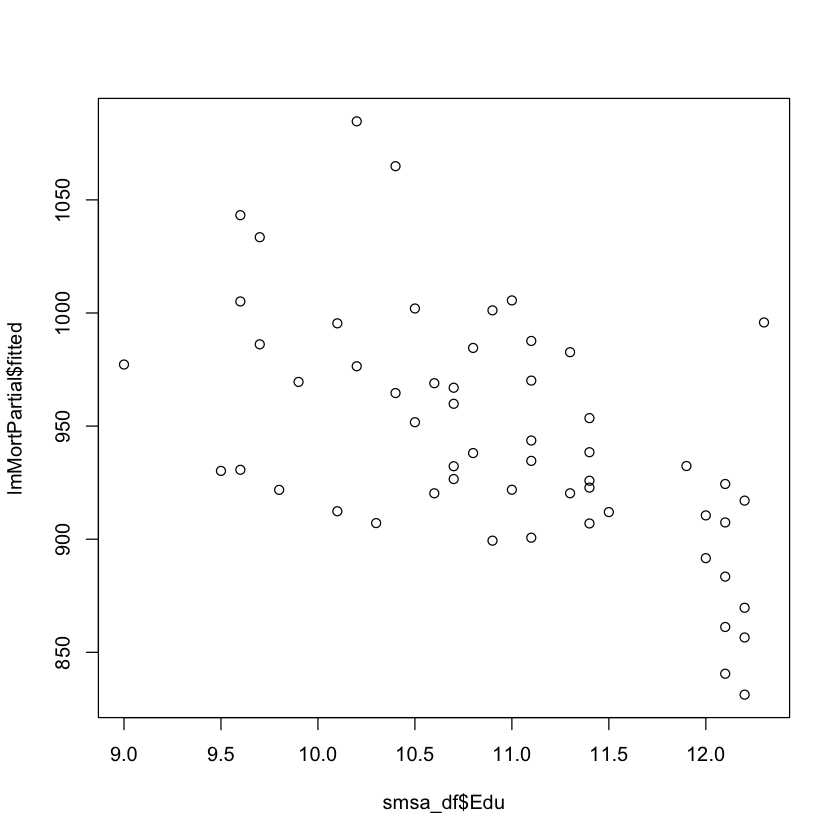

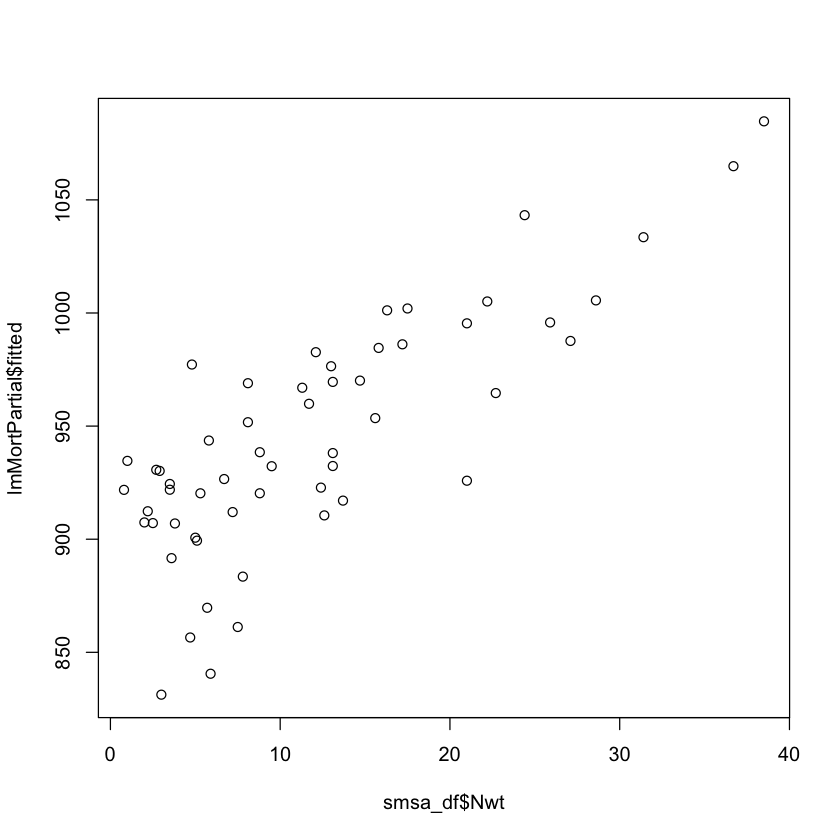

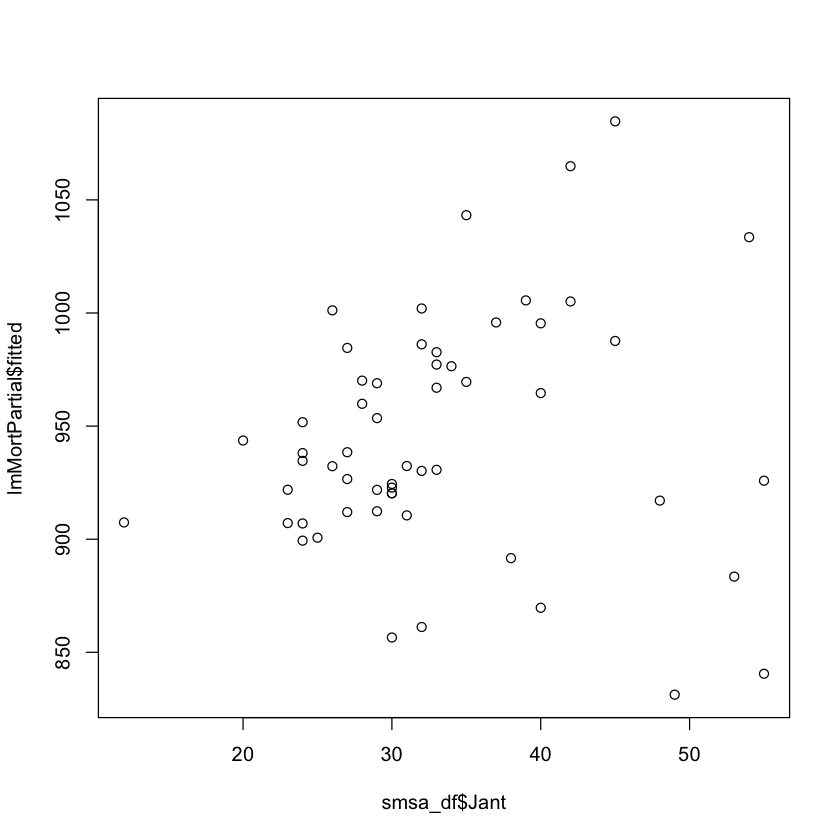

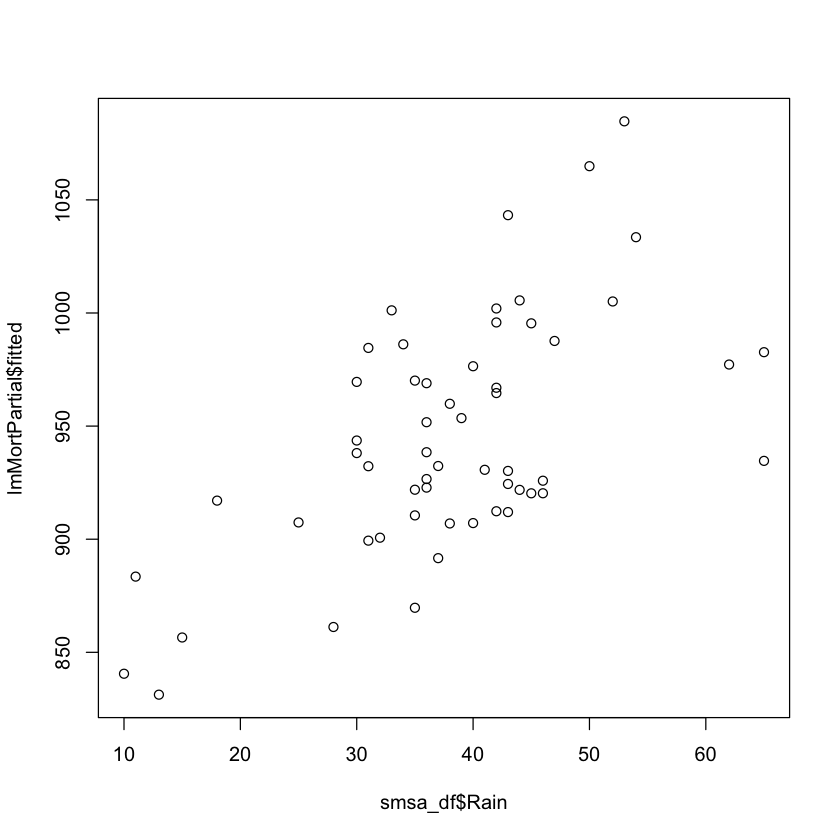

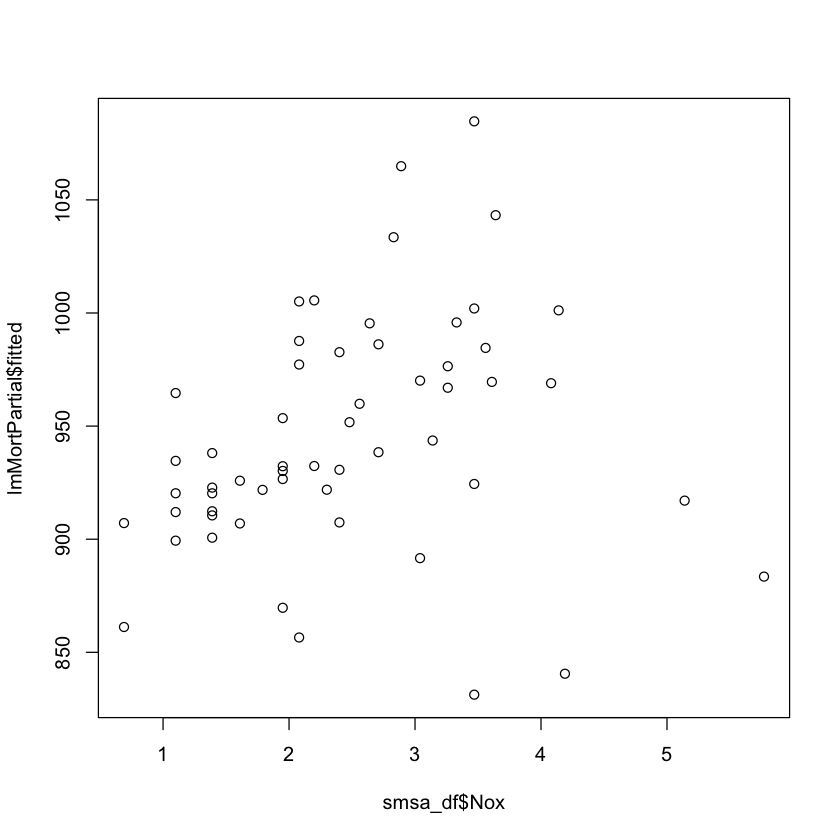

In [66]:
# plot(lmMortPartial)
plot(lmMortPartial$fitted~smsa_df$Edu)
plot(lmMortPartial$fitted~smsa_df$Nwt)
plot(lmMortPartial$fitted~smsa_df$Jant)
plot(lmMortPartial$fitted~smsa_df$Rain)
plot(lmMortPartial$fitted~smsa_df$Nox)